In [ ]:
#Linear Algebra
import numpy as np
import pandas as pd

In [ ]:
#load the Libraries and data
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data=pd.read_csv('/content/Sales.csv')

In [ ]:
#Grab the relevant data,scale the predictor variable and add a column
x=data['GrLivArea']
y=data['SalePrice']

x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]

In [ ]:
#Gradient Descent

alpha=0.01
iterations=1000
m=y.shape[0]
np.random.seed(123)
theta=np.random.randn(2,1)

In [ ]:
#Gradient Descent

def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction=np.dot(x,theta)
    error=prediction-y.values.reshape(-1,1) # convert y to a numpy array and reshape to be compatible with prediction
    cost=(1/(2*m))*np.dot(error.T,error)
    past_costs.append(cost)
    theta=theta-(1/m)*alpha*(np.dot(x.T,error))
    past_thetas.append(theta)
  return past_thetas,past_costs

#pass the relevant variable to the function and get the new values back..
past_thetas, past_costs = gradient_descent(x,y,theta,iterations,alpha)
theta=past_thetas[-1]

#result
# removed the extra space within the curly braces
print('Gradient Descent:{:.2f},{:.2f}'.format(theta[0][0],theta[1][0]))



Gradient Descent:180913.39,56292.45


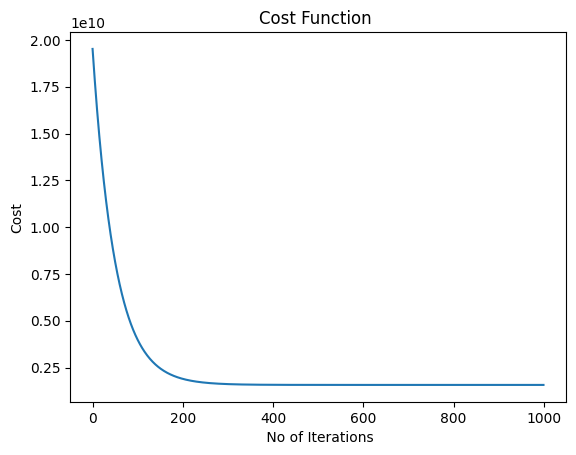

In [ ]:
#plot the cost function..
plt.title('Cost Function ')
plt.ylabel('Cost')
plt.xlabel(' No of Iterations')
plt.plot(past_costs)
plt.show()

In [ ]:
from __future__ import annotations
#set the plot up,
fig=plt.figure()
ax=plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('SalePrice ($)')
plt.scatter(x[:,1],y,color='red')
line, =ax.plot([],[],lw=2)
annotation = ax.text(-1,350000,'')
annotation.set_animated(True)
plt.close()


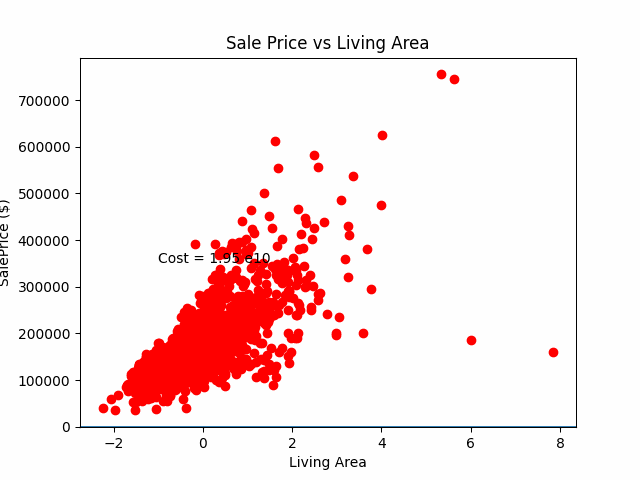

In [ ]:
from __future__ import annotations

#set the plot up,
fig=plt.figure()
ax=plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('SalePrice ($)')
plt.scatter(x[:,1],y,color='red')
line, =ax.plot([],[],lw=2)
annotation = ax.text(-1,350000,'')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
  line.set_data([],[])
  annotation.set_text('')
  return line,annotation

#animation fuction
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  annotation.set_text('Cost = %.2f e10 '% (past_costs[i]/10000000000))
  return line,annotation

anim=animation.FuncAnimation(fig,animate,init_func=init,frames=300,interval=0,blit=True) # Fixed: moved outside the function

anim.save('animation.gif',writer='imagemagick',fps=30) # Fixed: moved outside the function


#Display the animation..
import io
import base64
from IPython.display import HTML

filename='animation.gif'

video=io.open(filename,'r+b').read()
encoded=base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# New Section